# Codificación afín

Pincha en este <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/imcod.png">enlace</a> para descargar una imagen.

Esta imagen está codificada con una transformación afín del tipo $$\mbox{imagen}_{i,j}\mapsto b*\mbox{imagen}_{i,j}+vector.$$
Todo módulo 256.

De la imágen original (sin codificar) sabemos que tenía dos puntos rojos, uno en la esquina superior izquierda y otro en la esquina inferior derecha.

## Ejercicios

- Decodifica la imagen y muéstrala aquí.

- Localiza a la persona que aparece en la imagen. Para ello tendrás que ir a la consejería de la facultad de Ciencias por  las tardes y preguntar por la persona que aparece en la fotografía.

- Muestra la fotografía a la persona que has localizado y dile tu nombre. El te dará un código.

- Ese código es el resultado de codificar un mensaje, siguiendo el procedimiento de Vigenêre con esta <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/matriz.txt"> matriz</a> y con una llave que tendréis que encontrar.

- Para encontrar la llave tendrás que mandar un wasa a un número de teléfono, identificarte y pedirle muy amablemente que te de la clave.

- El número de teléfono al que tendrás que mandar el wasa ha sido codificado utilizando el procedimiento RSA con llaves públicas $e=12343$ y 
$$n=1000000000000000000390001300000000000000000507$$ 
y el resultado es 
$$862987092548752514737921262586293739762725407
$$
 
- Si no eres capaz de decodificar el número de teléfono y viniste a clase el lunes 27 pincha <a href="http://www.ugr.es/%7Ebullejos/numeros/pista1.html" target="new">aquí</a>, si no viniste pincha <a href="http://www.ugr.es/%7Ebullejos/numeros/pista2.html" target="new">aquí</a>.

- Una vez decodificado el código, que te ha proporcionado la persona de la fotografía que has decodificado, verás que este es el nombre de una montaña. Averigua su altura y pincha en <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/usuario.html" target="new">este enlace</a>. Entra con tu primer apellido (mayúsculas y sin acentos) como usuario y la altura de la montaña como contraseña. Entonces sigue las instrucciones.

# Práctica

Se explica aquí la resolución de la práctica. Los pasos que he seguido son los siguientes:

  1. Usando la imagen y los datos que tenemos sobre los puntos rojos, he probado todas las decodificaciones posibles bajo esas condiciones para conseguir la imagen original.
  2. Con la imagen original hemos conseguido la montaña codificada en conserjería.
  3. Hemos factorizado $n$ para poder decodificar la codificación RSA. Con ella hemos obtenido el número de teléfono.
  4. Hemos escrito al número de teléfono para conseguir la clave de Vigenère.
  5. Hemos obtenido el nombre de la montaña desde Vigenère y simplemente hemos consultado su altura.

Pero también he añadido algo más a la práctica. Aprovechando debilidades en cómo se presenta la información en el servidor de la UGR:

  1. He obtenido la altura de la montaña asociada a mi apellido con peticiones al servidor.
  2. He obtenido el nombre de la montaña consultando internet.
  3. He obtenido la clave de Vigènere usando el algoritmo en dirección inversa.
  4. He podido escribir al número de teléfono conociendo ya la clave.

In [1]:
## Cargamos los módulos necesarios para la práctica
# Módulo de tratamiento de imágenes PIL.
from PIL import Image
# Módulo de cálculo numérico numpy.
from numpy import array
# Módulo de cálculo simbólico sympy.
from sympy import *
# Módulo propio de criptografía
from criptoMRG import *

## 1. Codificación afín de la imagen

Se nos ha dado una imagen codificada con una transformación afín del tipo siguiente en $\mathbb{Z}_{256}$: 

$$\mbox{imagen}_{i,j}\mapsto t*\mbox{imagen}_{i,j}+(r,g,b)$$

La cargaremos en memoria con el módulo PIL y la llevaremos a una matriz.

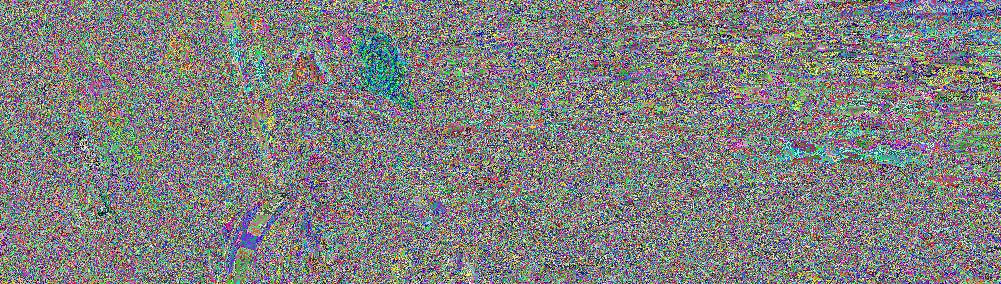

In [2]:
# Carga la imagen dada con el módulo PIL.
imag = Image.open('./imcod.png')
# Carga la imagen en una matriz
imagen = imag.copy()
# Muestra la imagen
imag

La pista que utilizamos para calcular la codificación de la imagen es que el punto de la esquina superior izquierda y el punto de la esquina inferior derecha eran puntos rojos. Podemos calcular entonces sus codificaciones buscándolos en la matriz.

In [3]:
# Ubicamos y obtenemos los dos puntos rojos
(n,m) = imagen.size
pixels = imagen.load()

# Nótese que los dos puntos rojos se han obtenido en las esquinas superior
# izquierda e inferior derecha.
pixels[0,0],pixels[n-1,m-1]

((1, 11, 222), (1, 11, 222))

#### Probando las soluciones posibles

Ahora que tenemos la codificación de un punto rojo, conocemos los siguientes datos sobre las claves con las que se ha codificado la imagen. Aplicando la codificación a un punto rojo `(255,0,0)`, obtenemos:

$$
\begin{aligned}
255 t + r \equiv_{256} 1 \\
0 t   + g \equiv_{256} 11 \\
0 t   + b \equiv_{256} 222 \\
\end{aligned}
$$

Desde donde deducimos que $g \equiv 11$ y $b \equiv 222$, además, tenemos la siguiente ecuación para $t$ y $r$:

$$
r-t \equiv_{256} 1
$$

Probaremos todas las decodificaciones posibles usando esos números. Generaremos las imágenes correspondientes a ellas y elegiremos la que sea correcta.

In [4]:
# Probamos todos los valores posibles para t y r.
# Para cada valor, vertemos la imagen conseguida en una carpeta.
# Luego comprobaremos visualmente cuál es la correcta.
for t in xrange(255):
    # Valores de rojo, verde y azul en el vector de codificación.
    r = (t+1)%256
    g = 11
    b = 222
    
    # Consideramos sólo el caso de que el coeficiente tenga una inversa multiplicativa. 
    if gcd(t, 256) == 1:
        
        # Decodifica la imagen usando el algoritmo y la guarda en nuestra carpeta.
        nueva = afinimgDec(imagen, t, r, g, b)
        nueva.save("decodimages/imagen_{}.png".format(t), 'PNG')

# Observamos que la imagen 123 se decodifica correctamente, esto nos da un coeficiente 123.

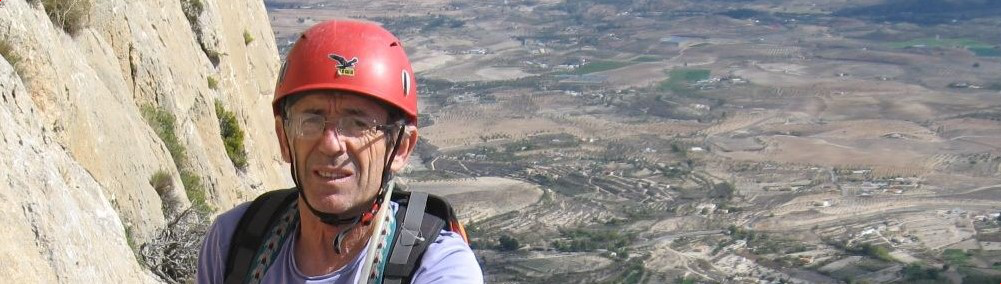

In [5]:
# Parámetros de decodificación correcta.
t = 123
r = (t+1)%256
g = 11
b = 222

afinimgDec(imagen, t,r,g,b)

## 2. RSA

#### Factorización
Para decodificar RSA, necesitamos ser capaces de factorizar el módulo en el que se está trabajando y obtener la clave privada que forma el totiente del número. Para factorizarlo utilizaremos externamente [WolframAlpha](https://www.wolframalpha.com/input/?i=factor(1000000000000000000390001300000000000000000507):

In [7]:
# El módulo dado
n = 1000000000000000000390001300000000000000000507
# Factorizamos n externamente en dos primos
p = 100000000000000000039
q = 10000000000000000000000013 
phi = (p-1)*(q-1)
phi

1000000000000000000380001200000000000000000456L

#### Decodificación
Tenemos entonces calculado el totiente del módulo usado en la codificación, y además conocemos el exponente que se usó para codificar y el número codificado. Utilizaremos una función de nuestra librería para decodificarlo.

In [8]:
y   = 862987092548752514737921262586293739762725407L
e   = 12343

rsaDec(y,n,phi,e)

699132868L

## 3. Vigenère

El mensaje que he encontrado tras llevar la imagen a conserjería es: **SHKXSHTJHKM**. Ese es el mensaje que debemos decodificar. Además, escribiendo al número de teléfono `699132868`, obtenemos la clave **ANTRAX**. Vamos a decodificar usando Vigenère.

El cifrado de Vigenère es un cifrado de sustitución simple que utiliza varios alfabetos de sustución según las posiciones de las letras en una clave dada. Es un cifrado simétrico, que de hecho, permite obtener la clave si se
conoce una codificación. En nuestro caso, tenemos una matriz, una clave y el mensaje codificado; así que tendremos
que decodificar utilizando un algoritmo que consultará en filas y columnas qué letras se codifican por la clave en 
el mensaje dado.

In [9]:
# Cargamos la matriz dada
matrizdada = map(
list, 
"""UZEJOTYDINSXCHMRWBGLQVAFKP
ZEJOTYDINSXCHMRWBGLQVAFKPU
EJOTYDINSXCHMRWBGLQVAFKPUZ
JOTYDINSXCHMRWBGLQVAFKPUZE
OTYDINSXCHMRWBGLQVAFKPUZEJ
TYDINSXCHMRWBGLQVAFKPUZEJO
YDINSXCHMRWBGLQVAFKPUZEJOT
DINSXCHMRWBGLQVAFKPUZEJOTY
INSXCHMRWBGLQVAFKPUZEJOTYD
NSXCHMRWBGLQVAFKPUZEJOTYDI
SXCHMRWBGLQVAFKPUZEJOTYDIN
XCHMRWBGLQVAFKPUZEJOTYDINS
CHMRWBGLQVAFKPUZEJOTYDINSX
HMRWBGLQVAFKPUZEJOTYDINSXC
MRWBGLQVAFKPUZEJOTYDINSXCH
RWBGLQVAFKPUZEJOTYDINSXCHM
WBGLQVAFKPUZEJOTYDINSXCHMR
BGLQVAFKPUZEJOTYDINSXCHMRW
GLQVAFKPUZEJOTYDINSXCHMRWB
LQVAFKPUZEJOTYDINSXCHMRWBG
QVAFKPUZEJOTYDINSXCHMRWBGL
VAFKPUZEJOTYDINSXCHMRWBGLQ
AFKPUZEJOTYDINSXCHMRWBGLQV
FKPUZEJOTYDINSXCHMRWBGLQVA
KPUZEJOTYDINSXCHMRWBGLQVAF
PUZEJOTYDINSXCHMRWBGLQVAFK""".split("\n"))

# Utlizamos la función de la biblioteca propia
mensajeCodificado = "SHKXSHTJHKM"
clavevigenere = "ANTRAX"
vigenereDec(mensajeCodificado, matrizdada, "ANTRAX")

'MOLAMENQING'

Hemos descubierto el nombre de nuestra montaña, Molameqing. Consultando en Wikipedia, podemos averiguar que tiene `7703m` de altura. Ya tenemos la clave con la que entregar la práctica aquí: http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/ROMAN7703.html

La práctica está terminada.

# 4. Ingeniería Inversa

### Procedimiento

Lo que sigue es un añadido a la práctica. A la vez que resolvía la práctica, he decidido resolverla en sentido contrario. He empezado por el final:

  - He averiguado la altura de la montaña mediante peticiones al servidor de la UGR.
  - Por la altura, he averiguado el nombre de la montaña.
  - Con el nombre de la montaña y el mensaje de conserjería, he conseguido la clave de Whatsapp.
  - Así, conocía la clave de Whatsapp antes de recibirla.

### Peticiones al servidor

Si seguimos el último enlace llegamos a una página web. Su código fuente puede consultarse fácilmente desde cualquier navegador web, así que lo leemos y averiguamos que en HTML de la página está escrito el **script** siguiente:

~~~
<script>
completeAndRedirect=function(){
 var cadena="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/"+document.forms[0].elements[0].value+document.forms[0].elements[1].value+".html";
 window.open(cadena,"nueva");
}		
</script>
~~~

Este es un pequeño script escrito en Javascript quue debía ser el responsable de redirigirnos a la página final una vez tenemos la altura de la montaña. Lo que nos indica el script es que una vez que rellenemos el formulario con usuario y contraseña, lo que hará será redirigirnos a una página de la forma:

~~~
http://www.ugr.es/~bullejos/numeros/alumnos/crip/<apellido><alturamontaña>.html
~~~

¡Pero esto es terriblemente inseguro! Mostraremos que es posible sin ningún dato previo obtener la altura de la montaña. Las alturas de las montañas se mueven en un rango no demasiado grande, podemos acotarlo entre `0000` y `9000`. Así que nuestra idea será ir pidiendo sucesivamente al servidor que consulte las páginas asociadas a nuestro apellido y cada altura posible, ¡hasta que encuentre la nuestra!

In [ ]:
# Usa las herramientas del sistema operativo. Esta pieza de script no tiene por qué funcionar
# en cualquier sistema operativo, pero lo hará en los sistemas basados en UNIX con wget instalado
import os

# Para cada posible altura entre 9000 y 0,
for i in reversed(range(9000)):
    
    # Envía una petición al servidor con mi apellido y la altura de la montaña que queremos probar.
    os.system('wget http://www.ugr.es/~bullejos/numeros/alumnos/crip/ROMAN' + str(i) + '.html')

Usando este script, el servidor respondió sólo en la altura `7703`.

#### Molamenqing
Obtenemos respuesta en la altura `7703`. Esa debe ser la altura de nuestra montaña y nuestra clave. El **Molamenqing** es el precisamente el pico que tiene esa misma altura. La forma de obtenerlo es simplemente acudir a la lista de [picos más altos del mundo](https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth#List) en Wikipedia y consultarla por altura.

### Invirtiendo Vigenère
Si conocemos la clave de conserjería, que era **SHKXSHTJHKM**, podemos darle la vuelta a la práctica. Vamos a averiguar la clave que necesitamos obtener por Whatsapp por ingeniería inversa. Así, además, evitamos utilizar una aplicación propietaria (no es software libre) como Whatsapp.

In [10]:
# ¡Nótese cómo coinciden las longitudes! Vamos por el buen camino.
montagna = "MOLAMENQING"
codifica = "SHKXSHTJHKM"

In [11]:
# Le damos la vuelta a la codificación, aprovechando que Vigenère es simétrico
# en la clave y el mensaje.
vigenereDec(codifica, matrizdada, montagna)

'ANTRAXANTRA'

In [12]:
# Y comprobamos que efectivamente, ANTRAX es la clave usada
vigenereDec(codifica, matrizdada, "ANTRAX")

'MOLAMENQING'

#### ¡Así consigo la clave antes de pedirla!

¡Perfecto! Eso quiere decir que la clave que estábamos buscando en el Whatsapp es precisamente `ANTRAX`. Ahora vamos a escribir al número que teníamos. Ahora, necesitamos un mecanismo que nos permita probarle a posteriori a nuestro interlocutor que teníamos la clave antes de que nos la diera. Vamos a recurrir a una técnica de **esteganografía** básica.

Como nos ha pedido una descripción de D. Bullejos, vamos a ocultar la clave `ANTRAX` en las primeras letras de las seis primeras palabras.

```
Antropomórfico, Naturalmente. Trabajador Resuelto Aunque eXcéntrico.
```

**El resultado es que cuando nos da la clave, podemos demostrarle que ya la conocíamos.** ¡Hemos terminado la práctica siguiendo el camino inverso desde la solución!

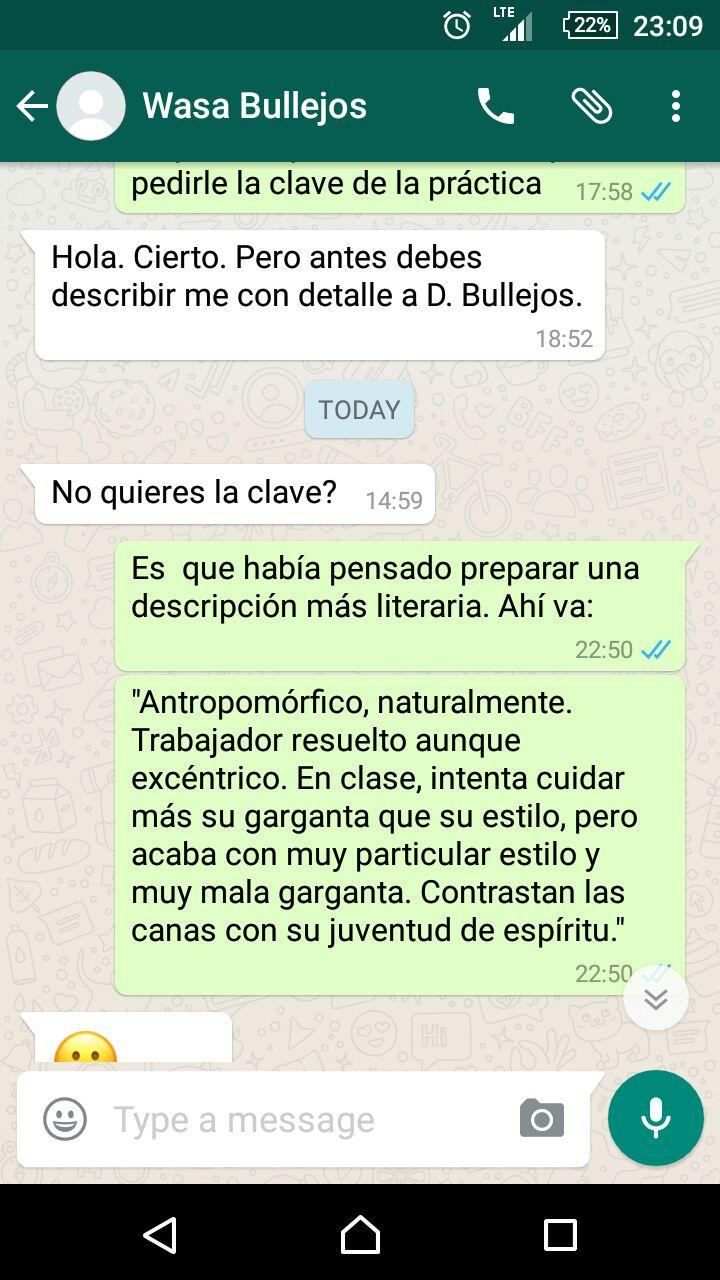

In [27]:
Image.open('./wasa1.jpg')

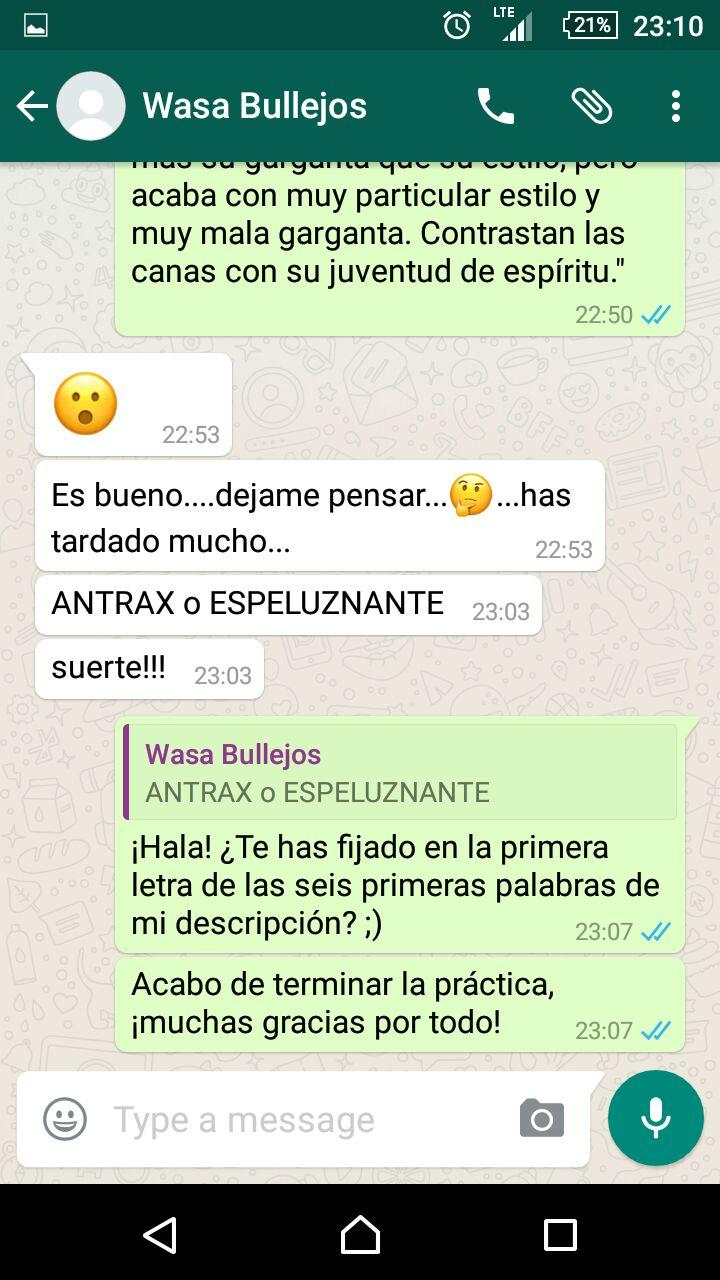

In [23]:
Image.open('./wasa2.jpg')

## 5. Terminar la práctica, en un script

En esta sección propongo un script que nos permite terminar la práctica dado un apellido. Se basa en automatizar la misma técnica que usé anteriormente pero restringiéndola a la lista de montañas más altas de wikipedia para hacerla más rápida.

In [49]:
# Listado de montañas en Wikipedia.
# Han sido extraídas usando Emacs como procesador de textos y una parte de manipulación manual para 
# limpiar los datos; pueden contener errores.
wikimountains = [
    ("Mount Everest", 8848),
    ("K2", 8611),
    ("Kangchenjunga", 8586),
    ("Lhotse", 8516),
    ("Makalu", 8485),
    ("Cho Oyu", 8188),
    ("Dhaulagiri", 8167),
    ("Manaslu", 8163),
    ("Nanga Parbat", 8126),
    ("Annapurna", 8091),
    ("Gasherbrum I", 8080),
    ("Broad Peak", 8051),
    ("Gasherbrum II", 8035),
    ("Shishapangma", 8027),
    ("Gyachung Kang", 7952),
    ("Gasherbrum III", 7946),
    ("Annapurna", 7937),
    ("Gasherbrum IV", 7932),
    ("Himalchuli", 7893),
    ("Distaghil Sar", 7884),
    ("Ngadi Chuli", 7871),
    ("Nuptse", 7864),
    ("Khunyang Chhish", 7823),
    ("Masherbrum", 7821),
    ("Nanda Devi", 7816),
    ("Chomo Lonzo", 7804),
    ("Batura Sar", 7795),
    ("Kanjut Sar", 7790),
    ("Rakaposhi", 7788),
    ("Namcha Barwa", 7782),
    ("Kamet", 7756),
    ("Dhaulagiri", 7751),
    ("Saltoro Kangri", 7742),
    ("Jannu", 7711),
    ("Tirich Mir", 7708),
    ("Molamenqing", 7703),
    ("Gurla Mandhata", 7694),
    ("Saser Kangri", 7672),
    ("Chogolisa", 7665),
    ("Dhaulagiri", 7661),
    ("Kongur Tagh", 7649),
    ("Dhaulagiri", 7618),
    ("Shispare", 7611),
    ("Trivor", 7577),
    ("Gangkhar Puensum", 7570),
    ("Mount Gongga", 7556),
    ("Annapurna", 7555),
    ("Muztagh Ata", 7546),
    ("Skyang Kangri", 7545),
    ("Changtse", 7543),
    ("Kula Kangri", 7538),
    ("Kongur Tagh", 7530),
    ("Mamostong Kangri", 7516),
    ("Saser Kangri", 7513),
    ("Ismoil Somoni Peak", 7495),
    ("Saser Kangri", 7495),
    ("Noshaq", 7492),
    ("Pumari Chhish", 7492),
    ("Passu Sar", 7476),
    ("Yukshin Gardan Sar", 7469),
    ("Teram Kangri", 7462),
    ("Jongsong Peak", 7462),
    ("Malubiting", 7458),
    ("Annapurna", 7455),
    ("Jengish Chokusu", 7439),
    ("Sunanda Devi", 7434),
    ("K12", 7428),
    ("Yangra", 7422),
    ("Sia Kangri", 7422),
    ("Momhil Sar", 7414),
    ("Kabru", 7412),
    ("Skil Brum", 7410),
    ("Haramosh Peak", 7409),
    ("Istor-o-Nal", 7403),
    ("Ghent Kangri", 7401),
    ("Ultar", 7388),
    ("Rimo I", 7385),
    ("Dhaulagiri", 7385),
    ("Teram Kangri", 7382),
    ("Sherpi Kangri", 7380),
    ("Labuche Kang", 7367),
    ("Kirat Chuli", 7362),
    ("Abi Gamin", 7355),
    ("Nangpai Gosum", 7350),
    ("Gimmigela", 7350),
    ("Saraghrar", 7349),
    ("Jomolhari", 7326),
    ("Chamlang", 7321),
    ("Chongtar", 7315),
    ("Baltoro Kangri", 7312),
    ("Siguang Ri", 7309),
    ("The Crown", 7295),
    ("Gyala Peri", 7294),
    ("Porong Ri", 7292),
    ("Baintha Brakk", 7285),
    ("Yutmaru Sar", 7283),
    ("K6", 7282),
    ("Kangpenqing", 7281),
    ("Muztagh Tower", 7276),
    ("Kamet", 7272),
    ("Dhaulagiri", 7268),
    ("Diran", 7266),
    ("Labuche Kang", 7250),
    ("Dhaulagiri", 7246),
    ("Apsarasas Kangri", 7245),
    ("Kamet", 7242),
    ("Rimo I", 7233),
    ("Langtang Lirung", 7227),
    ("Karjiang", 7221),
    ("Annapurna", 7219),
    ("Khartaphu", 7213),
    ("Tongshanjiabu", 7207),
    ("Malangutti Sar", 7207),
    ("Noijin Kangsang", 7206),
    ("Langtang Ri", 7205),
    ("Kangphu Kang", 7204),
    ("Singhi Kangri", 7202),
    ("Lupghar Sar", 7200)]

In [42]:
# Librería necesaria para enviar peticiones HTML al servidor.
import requests

# FUnción auxiliar que nos dice si existe la página que estamos buscando.
def existeLaPagina(url):
    # Pide la página, si el status es 200, es que se ha obtenido sin errores
    # y por tanto existe. No existe en cualquier otro caso.
    request = requests.get(url)
    return request.status_code == 200

# Dado un apellido, envía peticiones con todas las posibles alturas de montañas,
# para y muestra los resultados en cuanto encuentra una.
def resuelvePracticaDe(apellido):
    
    # Para cada montaña en la lista, comprueba si existe la página asociada a
    # su altura
    for mountain, height in wikimountains:
        if existeLaPagina('http://www.ugr.es/~bullejos/numeros/alumnos/crip/' + apellido + str(height) + '.html'):
            print "La práctica de "+apellido+" está asociada a la altura "+str(height)+". El pico con esa altura es el "+mountain+"."
            return

#### Resolviendo prácticas
Pruebo el script con mi práctica y las prácticas de algunos compañeros de los que conozco el apellido.

In [23]:
# Mi práctica
resuelvePracticaDe('ROMAN')

La práctica de ROMAN está asociada a la altura 7703. El pico con esa altura es el Molamenqing.


In [24]:
resuelvePracticaDe('PADILLA')

La práctica de PADILLA está asociada a la altura 7782. El pico con esa altura es el Namcha Barwa.


In [26]:
resuelvePracticaDe('TORRES')

La práctica de TORRES está asociada a la altura 7611. El pico con esa altura es el Shispare.


In [43]:
resuelvePracticaDe('CHARTE')

La práctica de CHARTE está asociada a la altura 8167. El pico con esa altura es el Dhaulagiri.


In [44]:
resuelvePracticaDe('ENTRENA')

La práctica de ENTRENA está asociada a la altura 8091. El pico con esa altura es el Annapurna.


In [45]:
resuelvePracticaDe('PIMENTEL')

La práctica de PIMENTEL está asociada a la altura 7756. El pico con esa altura es el Kamet.


In [46]:
resuelvePracticaDe('CERRATO')

La práctica de CERRATO está asociada a la altura 8188. El pico con esa altura es el Cho Oyu.


In [47]:
resuelvePracticaDe('TRILLO')

La práctica de TRILLO está asociada a la altura 7577. El pico con esa altura es el Trivor.
